## ⚠️ Requisitos importantes antes de ejecutar este notebook

Este notebook está diseñado para ejecutarse en **Google Colab**.  
Requiere el uso de una **GPU T4** y una correcta configuración de rutas para funcionar correctamente.

### 1. Tipo de entorno
- Ve a `Entorno de ejecución > Cambiar tipo de entorno` y selecciona **GPU T4**
- Comprueba que se ha asignado una **GPU T4** ejecutando:
### 2. Instalación de librerías

Tras la instalación de las librerías necesarias, es obligatorio reiniciar el entorno antes de continuar con la ejecución.

Ve a Entorno de ejecución > Reiniciar entorno de ejecución

### 3. Configuración de rutas

Antes de ejecutar las celdas principales, configura correctamente las siguientes rutas:

model_path: ruta donde se encuentran los modelos entrenados y otros artefactos.

utils_path: ruta donde se encuentra el archivo utils.py con las funciones auxiliares necesarias para el notebook.

In [1]:
# ========================================
# Instalación de dependencias
# ========================================
!pip install faster-whisper librosa torchaudio ultralytics yt-dlp opencv-python pandas matplotlib mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 11.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s e

In [1]:
# ========================================
# Código interactivo con botón y carga de video
# ========================================

import os
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import files

# Montar Google Drive
from google.colab import drive
if not os.path.isdir("/content/drive/MyDrive"):
    drive.mount('/content/drive')

# Ruta completa a la carpeta models
model_path = "/content/drive/MyDrive/Analisis_Multimodal_Comunicacion_TFM/models"

# Ruta completa a la carpeta "utils"
utils_path = "/content/drive/MyDrive/Analisis_Multimodal_Comunicacion_TFM/utils"
import sys
sys.path.append(utils_path)

from utils import analisis_multimodal  # Aquí está tu función run()

Mounted at /content/drive


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Configuración de Dispositivo:
Tipo: CUDA
GPU: Tesla T4
Capacidad: (7, 5)
Memoria Total: 14.74 GB



vocabulary.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/484M [00:00<?, ?B/s]

Whisper configurado en cuda con compute_type=float32


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## 🎥 Analizar un video

Al ejecutar la celda siguiente, podrás elegir entre dos opciones para cargar el video que deseas analizar:

- **Opción 1**: Pegar la URL de un video (por ejemplo, de YouTube) para descargarlo automáticamente.
- **Opción 2**: Seleccionar un archivo de video que tengas guardado en tu disco local.

Sigue las instrucciones dentro de la celda para seleccionar la opción deseada.




Elige opción:
1. Descargar desde URL
2. Subir desde tu disco
Selecciona 1 o 2: 1
Introduce la URL del video: https://www.ted.com/talks/cameron_russell_looks_aren_t_everything_believe_me_i_m_a_model
✅ Video 1647 procesado en 93.58 segundos.
🎯 Tus cualidades comunicativas según el modelo: 71 %
🟢 Nivel de comunicador **medio-alto**

🔷 FEEDBACK GLOBAL
🟢 En general, las características del orador favorecen positivamente la predicción del modelo.




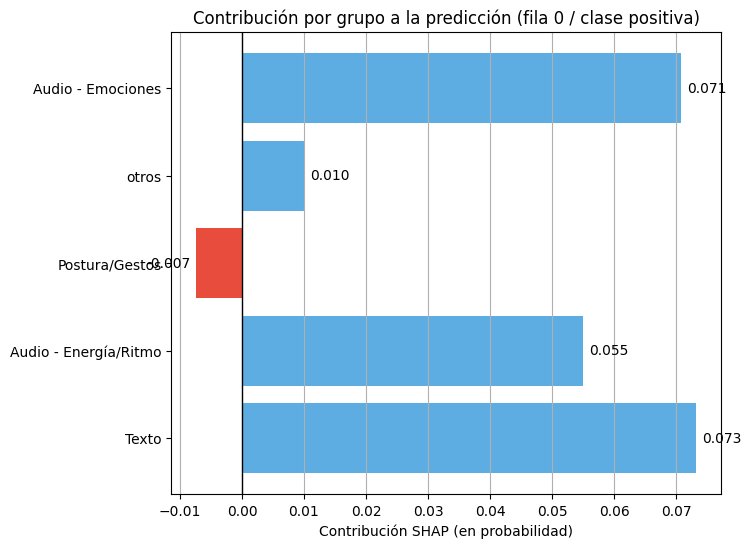


🟩 FEEDBACK — Grupo: Texto
🔵 El grupo **Texto** tiene una influencia positiva destacada en la predicción.



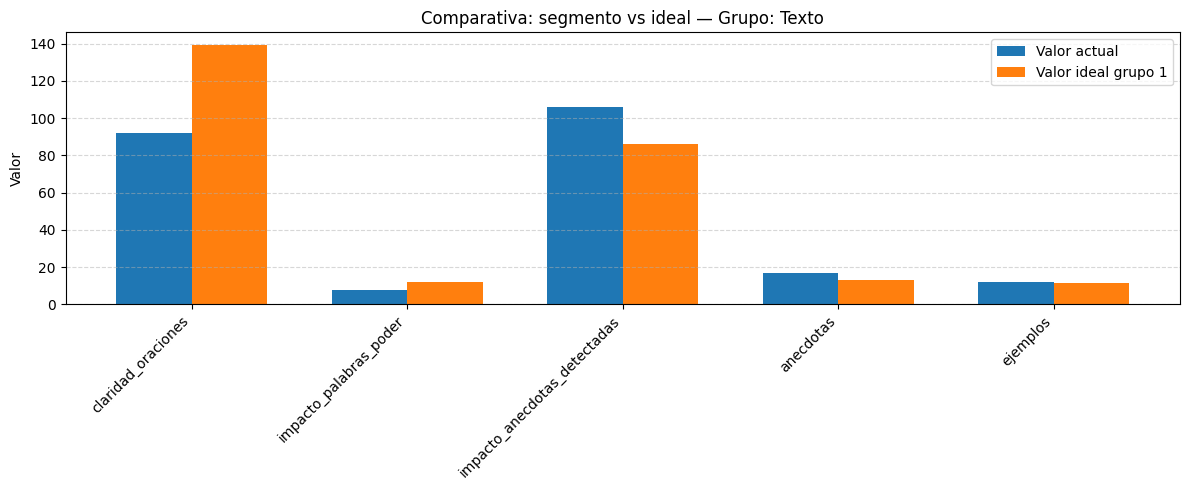

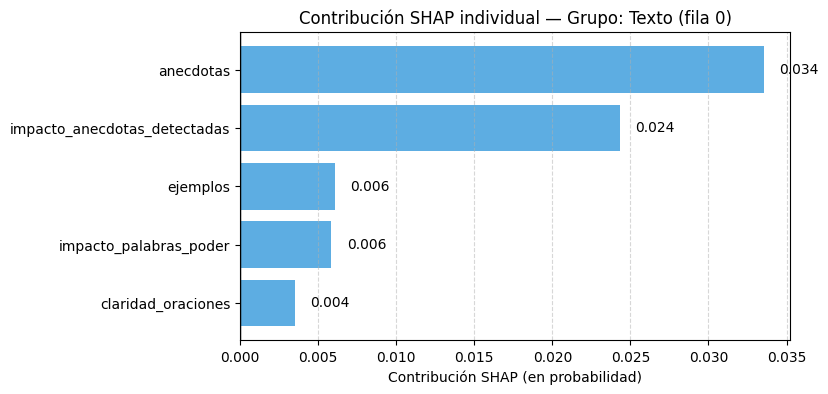

   🔹 claridad_oraciones: Claridad sintáctica y gramatical del texto. Frases bien estructuradas facilitan la comprensión.
Tiene un valor de `92.00` frente a un ideal de `139.04` (diferencia `-47.04`). SHAP=+0.004. A pesar de usar estructuras menos claras, estás comunicando eficazmente.

   🔹 impacto_palabras_poder: Uso de palabras con carga persuasiva, emocional o enfática.
Tiene un valor de `8.00` frente a un ideal de `12.31` (diferencia `-4.31`). SHAP=+0.006. Usas pocas palabras poderosas, pero en tu caso eso mejora la naturalidad.

   🔹 impacto_anecdotas_detectadas: Impacto estimado de las anécdotas utilizadas en el discurso.
Tiene un valor de `106.00` frente a un ideal de `85.89` (diferencia `+20.11`). SHAP=+0.024. Tus anécdotas están generando un impacto muy positivo en la audiencia.

   🔹 anecdotas: Número o presencia de anécdotas personales o ejemplificadoras.
Tiene un valor de `17.00` frente a un ideal de `13.18` (diferencia `+3.82`). SHAP=+0.034. Incluir anécdotas mejora tu cer

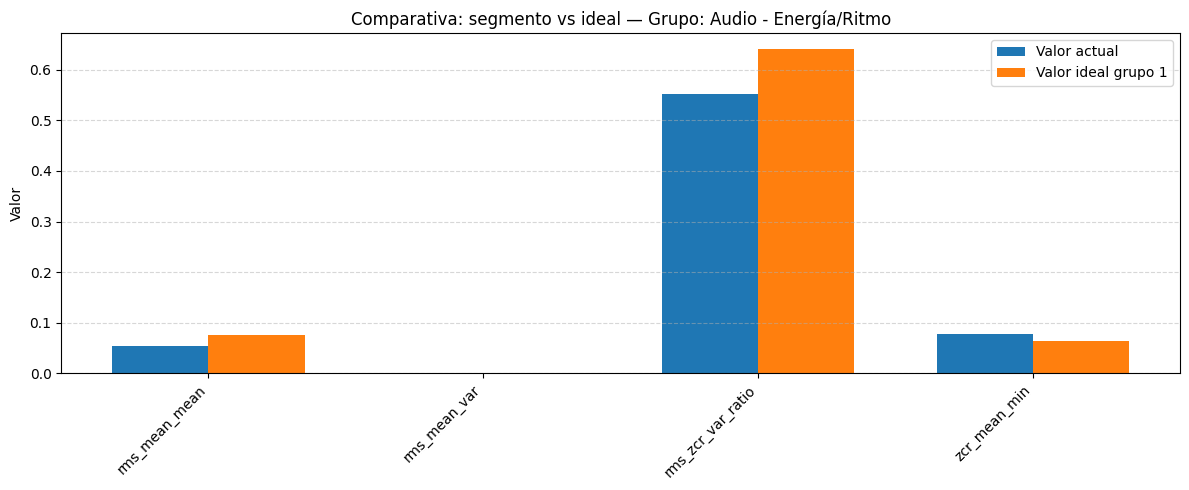

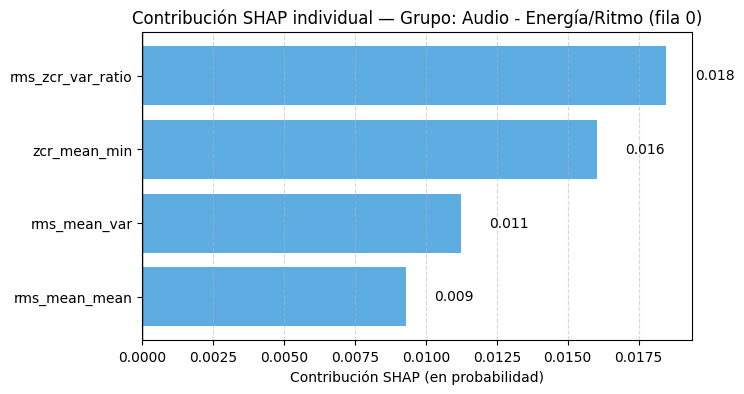

   🔹 rms_mean_mean: Energía vocal media. Relacionada con el volumen general.
Tiene un valor de `0.05` frente a un ideal de `0.08` (diferencia `-0.02`). SHAP=+0.009. Tu energía vocal está en el rango óptimo.

   🔹 rms_mean_var: Variabilidad de energía vocal. Indica cambios de volumen que aportan expresividad.
Tiene un valor de `0.00` frente a un ideal de `0.00` (diferencia `-0.00`). SHAP=+0.011. Tu variación de energía está equilibrada.

   🔹 rms_zcr_var_ratio: Relación entre variabilidad de energía y ritmo. Indicador de control vocal.
Tiene un valor de `0.55` frente a un ideal de `0.64` (diferencia `-0.09`). SHAP=+0.018. Aunque tu ritmo es más pausado, está ayudando a la claridad.

   🔹 zcr_mean_min: Duración de las pausas prolongadas en el discurso.
Tiene un valor de `0.08` frente a un ideal de `0.06` (diferencia `+0.02`). SHAP=+0.016. El uso de pausas está equilibrado.


🟩 FEEDBACK — Grupo: Audio - Emociones
🔵 El grupo **Audio - Emociones** tiene una influencia positiva destacada en 

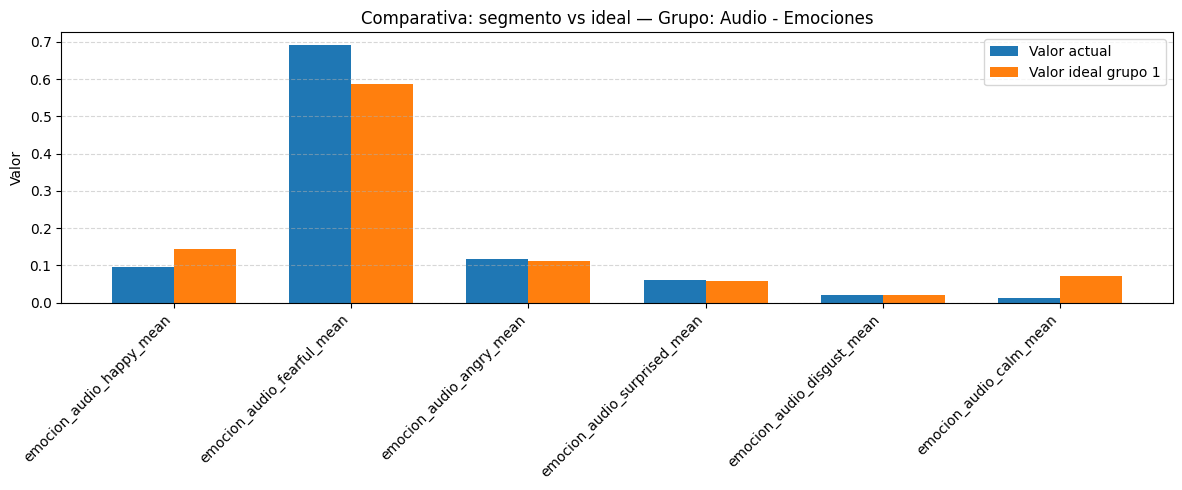

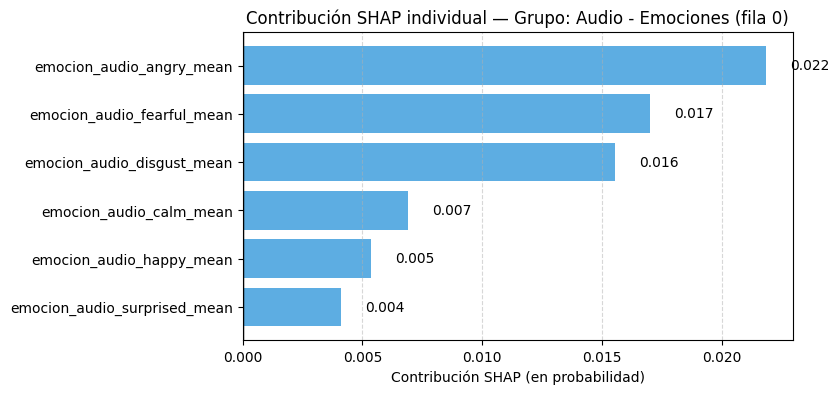

   🔹 emocion_audio_happy_mean: Promedio de emoción de felicidad detectada en el audio.
Tiene un valor de `0.10` frente a un ideal de `0.14` (diferencia `-0.05`). SHAP=+0.005. Transmitiste un nivel adecuado de entusiasmo.

   🔹 emocion_audio_fearful_mean: Promedio de emoción de miedo detectado en el audio.
Tiene un valor de `0.69` frente a un ideal de `0.59` (diferencia `+0.10`). SHAP=+0.017. Una ligera tensión añade humanidad al mensaje.

   🔹 emocion_audio_angry_mean: Promedio de emoción de enojo detectado en el audio.
Tiene un valor de `0.12` frente a un ideal de `0.11` (diferencia `+0.01`). SHAP=+0.022. Transmitiste una intensidad emocional adecuada.

   🔹 emocion_audio_surprised_mean: Promedio de emoción de sorpresa detectada en el audio.
Tiene un valor de `0.06` frente a un ideal de `0.06` (diferencia `+0.00`). SHAP=+0.004. El nivel de expresividad está bien regulado.

   🔹 emocion_audio_disgust_mean: Promedio de emoción de desagrado detectado en el audio.
Tiene un valor de `0.02`

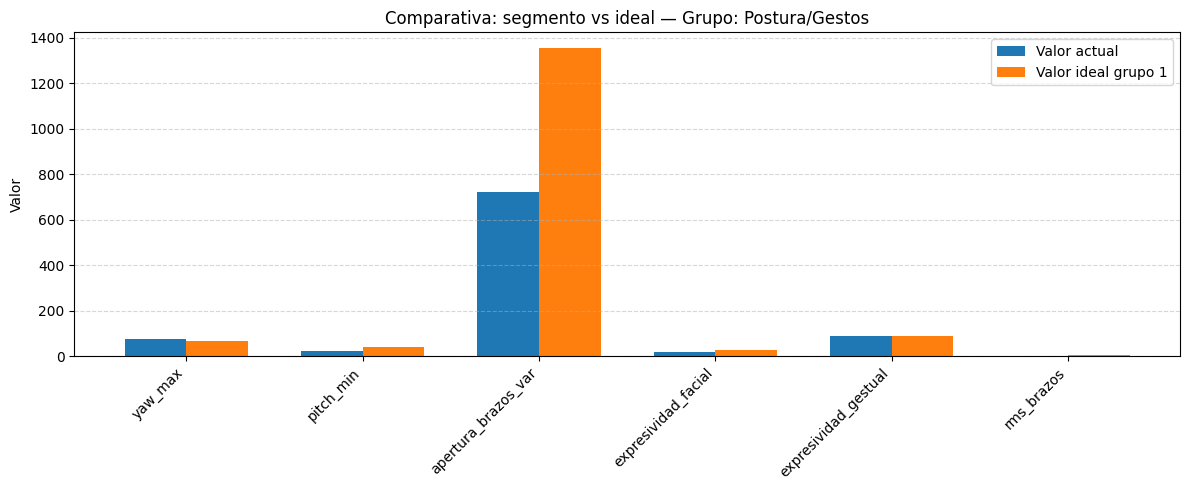

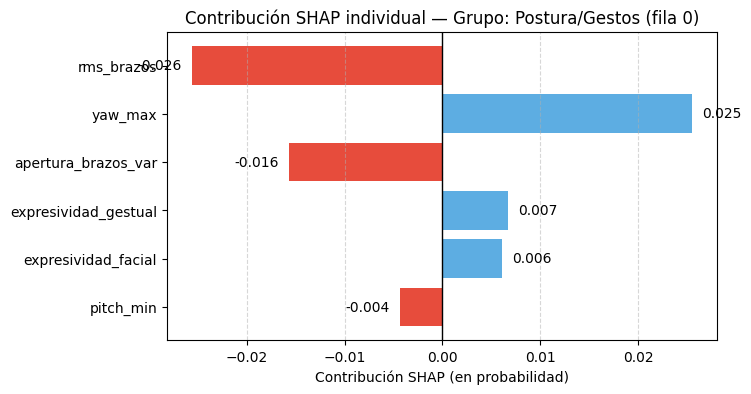

   🔹 yaw_max: Movimiento máximo de la cabeza (horizontal).
Tiene un valor de `73.61` frente a un ideal de `67.15` (diferencia `+6.46`). SHAP=+0.025. Tu movimiento de cabeza aporta naturalidad y conexión.

   🔹 pitch_min: Inclinación vertical mínima de la cabeza (pitch). Indica cuánto baja la cabeza durante el segmento.
Tiene un valor de `24.56` frente a un ideal de `41.71` (diferencia `-17.15`). SHAP=-0.004. Poca variación en la inclinación puede hacer que tu expresividad corporal sea limitada.

   🔹 apertura_brazos_var: Variación en la apertura de brazos. Relacionada con gestualidad abierta.
Tiene un valor de `721.46` frente a un ideal de `1355.42` (diferencia `-633.96`). SHAP=-0.016. Podrías abrir más tus gestos para conectar mejor con el público.

   🔹 expresividad_facial: Nivel de expresividad en el rostro.
Tiene un valor de `20.15` frente a un ideal de `28.51` (diferencia `-8.36`). SHAP=+0.006. Tu expresión neutra ayuda a enfocarse en el contenido.

   🔹 expresividad_gestual: Expr

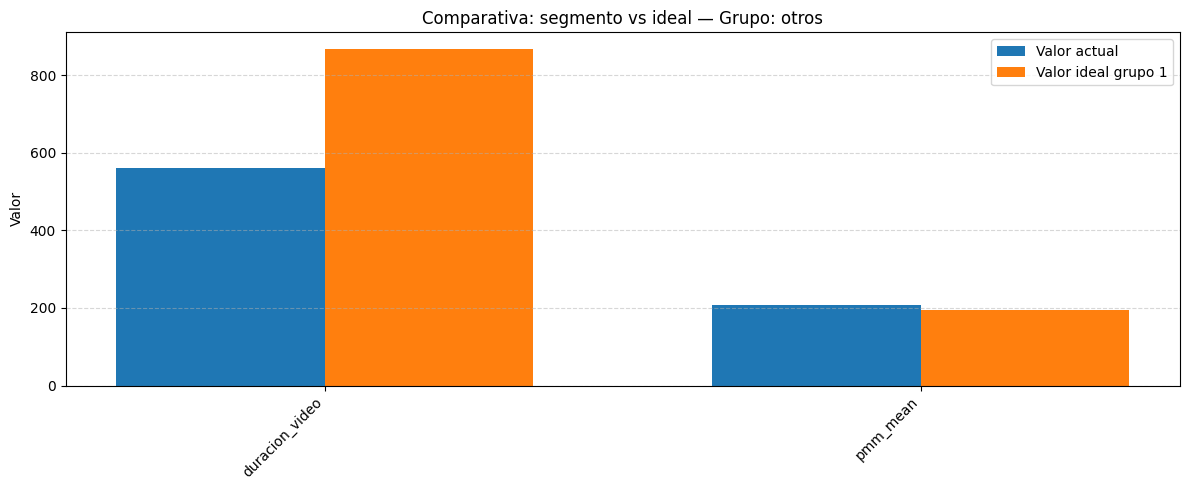

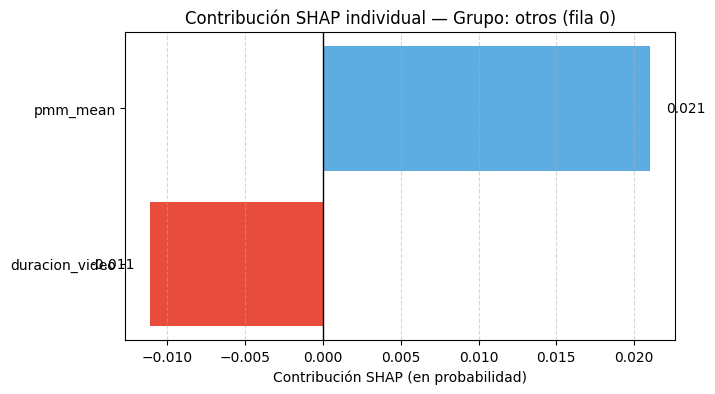

   🔹 duracion_video: Duración total del video analizado.
Tiene un valor de `561.02` frente a un ideal de `866.82` (diferencia `-305.80`). SHAP=-0.011. Podrías extender un poco más el contenido para reforzar tus ideas.

   🔹 pmm_mean: Velocidad de habla (palabras por minuto).
Tiene un valor de `206.33` frente a un ideal de `193.62` (diferencia `+12.72`). SHAP=+0.021. Tu velocidad transmite dinamismo y energía.



In [3]:


if __name__ == "__main__":

    _,_=analisis_multimodal(model_path)

In [ ]:

# url='https://www.ted.com/talks/cameron_russell_looks_aren_t_everything_believe_me_i_m_a_model'
# # url="https://www.ted.com/talks/sam_berns_my_philosophy_for_a_happy_life"